In [ ]:
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
os.listdir('/content/gdrive/MyDrive/study3_simpson')

['pix2pix.ipynb', 'simpson_prac.ipynb', 'cropped.zip', 'simplified.zip']

In [ ]:
!unzip -qq "/content/gdrive/MyDrive/study3_simpson/cropped.zip"

In [ ]:
!unzip -qq "/content/gdrive/MyDrive/study3_simpson/simplified.zip"

In [ ]:
cropped_lst = os.listdir('/content/cropped/cropped')
print(len(cropped_lst))
simplified_lst = os.listdir('/content/simplified/simplified')
print(len(simplified_lst))
print(cropped_lst[0])

8491
4099
7993.png


In [ ]:
os.listdir('/content/cropped/cropped')

In [ ]:
import cv2
a = cv2.imread('content/cropped/cropped/10.png',1)
print(a)

None


In [ ]:
#os.listdir('/content/cropped/cropped')

In [ ]:
# concat image

import cv2
import numpy as np

for img_num in cropped_lst: # img = 7993.png
  #print(img_num)

  if img_num in simplified_lst:
    img_gt = cv2.imread("/content/cropped/cropped/"+img_num, 1)
    img_input = cv2.imread("/content/simplified/simplified/"+img_num, 1)
    #print(img_gt.shape, img_input.shape)
    img_input = cv2.resize(img_input, (128,128))
    img_gt = cv2.resize(img_gt, (128,128))
    #print(img_gt.shape, img_input.shape)
    combined_img = cv2.hconcat([img_input, img_gt])
    print(combined_img.shape)
    new_img_path = "/content/gdrive/MyDrive/study3_simpson/dataset/"+img_num

    cv2.imwrite(new_img_path, combined_img)


In [ ]:
PATH = "/content/gdrive/MyDrive/study3_simpson/dataset/"

In [ ]:
os.listdir(PATH)[:3]

['6932.png', '2846.png', '6477.png']

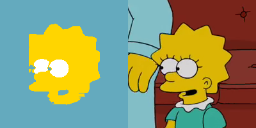

In [ ]:
from google.colab.patches import cv2_imshow
sample_image = cv2.imread("/content/gdrive/MyDrive/study3_simpson/dataset/6477.png",1)
cv2_imshow(sample_image)

In [ ]:
from PIL import Image
import imageio

def load():
  image = imageio.imread(sample_image).astype(np.float)

  w = int(image.shape[1]/2)
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image